In [386]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [387]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [388]:
df.head()

,type,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [389]:
df.shape

(5572, 5)

I.DATA CLEANING

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        5572 non-null   object
 1   msg         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [391]:
#since last 3 coloumns have very few values in comparision to first two drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [392]:
df.sample(5)

,type,msg
4103,ham,Do u hav any frnd by name ashwini in ur college?
840,ham,I luv u soo much u donåÕt understand how speci...
4962,ham,I want to see your pretty pussy...
3781,ham,How r Ì_ going to send it to me?
61,ham,Ha ha ha good joke. Girls are situation seekers.


In [393]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [394]:
df['type']=encoder.fit_transform(df['type'])

In [395]:
df.sample(5)

,type,msg
4565,0,Should i buy him a blackberry bold 2 or torch....
3094,0,Olol i printed out a forum post by a guy with ...
1667,0,So now my dad is gonna call after he gets out ...
4536,0,Normally i use to drink more water daily:)
5388,0,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!


In [396]:
#checking for missing values
df.isnull().sum()

type    0
msg     0
dtype: int64

In [397]:
#check for duplicate values
df.duplicated().sum()

403

In [398]:
df=df.drop_duplicates(keep='first')

In [399]:
df.duplicated().sum()

0

In [400]:
df.shape

(5169, 2)

II. EDA

In [401]:
#check distribution of sapm and ham/real msg 0-->ham  1-->spam
df['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

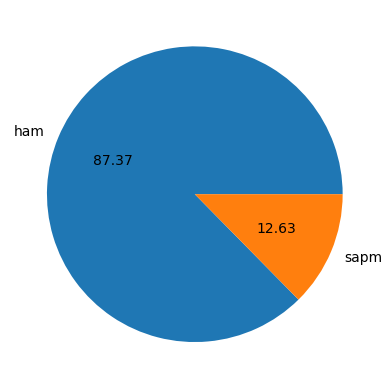

In [402]:
#represent it graphically
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [403]:
#Data is imbalanced ham is huge
import nltk

In [404]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [405]:
#length in terms of characters used in that sentence
df['num_characters']=df['msg'].apply(len)

In [406]:
df.sample(5)

,type,msg,num_characters
1381,0,We spend our days waiting for the ideal path t...,155
628,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,130
663,0,Leave it de:-). Start Prepare for next:-)..,43
2648,0,"Hi, can i please get a &lt;#&gt; dollar loan...",96
508,0,What's the significance?,24


In [407]:
#fetch the number of words length
df['num_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [408]:
df.sample(4)

,type,msg,num_characters,num_words
3567,0,Sent me de webadres for geting salary slip,42,8
4087,0,He needs to stop going to bed and make with th...,63,13
3524,0,I not free today i haf 2 pick my parents up to...,53,13
927,0,K:)i will give my kvb acc details:),35,12


In [409]:
#fetch the number of sentences length
df['num_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [410]:
df.head()

,type,msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [411]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [412]:
#description of msg on the basis of ham
df[df['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [413]:
#description of msg on the basis of spam
df[df['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

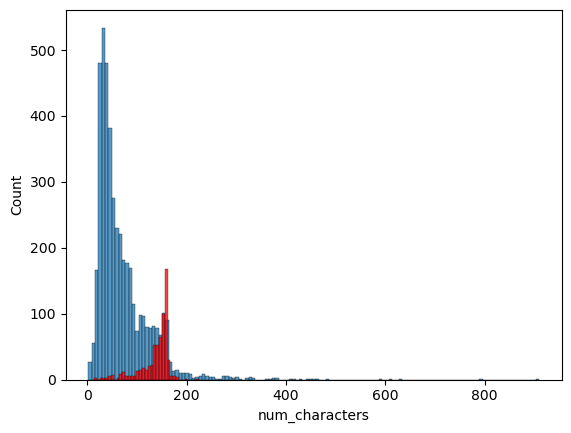

In [414]:
#to graphically understand the difference in msg
import seaborn as sns
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='red')

# as we can observe that most of ham/real message are of 0 to 150 characters whereas
#spam most msg range from 160-190 characters approx

<AxesSubplot:>

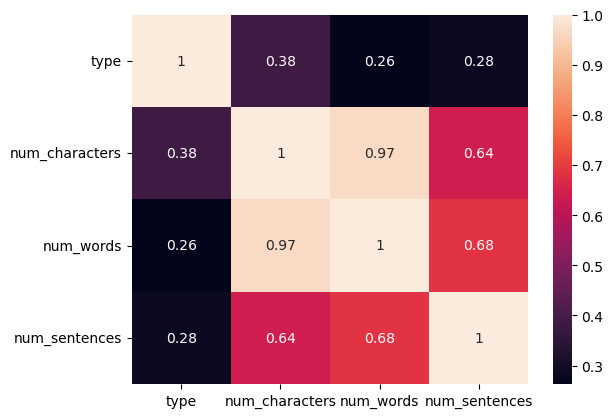

In [415]:
sns.heatmap(df.corr(),annot=True)
#since num words,char and sentences have high collinearity we chose only one 

III DATA PREPROCESSING

In [416]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [417]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [418]:
transform_text('HI GOOD BAD SAD Lopez %^*&&* IS ARE.Are you a funny person')

'hi good bad sad lopez funni person'

In [419]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [420]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('talking')

'talk'

In [421]:
df['transformed_text']=df['msg'].apply(transform_text)

In [422]:
df.sample(5)

,type,msg,num_characters,num_words,num_sentences,transformed_text
2203,0,soon you will have the real thing princess! Do...,65,17,3,soon real thing princess make wet
2327,1,URGENT! Your mobile number *************** WON...,167,46,5,urgent mobil number bonu caller prize 2nd atte...
236,0,Or ill be a little closer like at the bus stop...,65,15,1,ill littl closer like bu stop street
4322,0,Aight well keep me informed,27,5,1,aight well keep inform
4302,0,Yup i'm free...,15,5,1,yup free


In [423]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [424]:
#word cloud of msg
# visual representations of text data where the size of each word corresponds to its frequency or importance within the text.
#to understand which words are mostly used in spam and real message

from wordcloud import WordCloud
wc=WordCloud(width=600,min_font_size=15,height=600,background_color='black')

In [425]:
spam_wc=wc.generate(df[df['type']==1]['transformed_text'].str.cat(sep=" "))

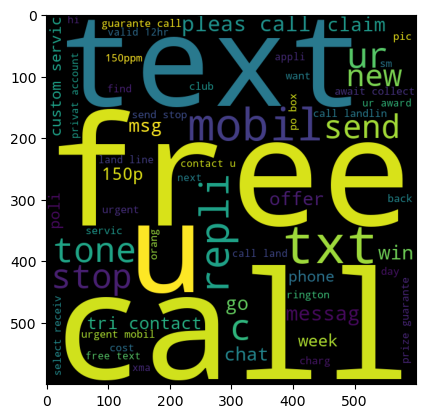

In [426]:
plt.imshow(spam_wc)

In [427]:
ham_wc=wc.generate(df[df['type']==0]['transformed_text'].str.cat(sep=" "))

IV. MODEL BUILDING ON NAIVE BAYES AS TEXTUAL DATA

In [428]:
#bag of words vectorization for textual data to numerical form

In [429]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [430]:
#since cv didnot gave a higher precision we use tfidf to check if there is a higher precision
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [431]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [432]:
Y=df['type'].values

In [433]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [434]:
from sklearn.model_selection import train_test_split

In [435]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [436]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [437]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [438]:
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [439]:
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

#highest precision is obtained in mnb when tfidf is used.....in email spam we care more about precision(i.e. spam lai ham ra ham lai spam nabhanne)

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [440]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [441]:
#choose tfidf----->multinomial nbayes
#to check if any other ML models perform better than naive bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [442]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [443]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [444]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [445]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


In [446]:
#improve model if we can
#when max features=3000 Naive bayes accuracy increases to 97 which is better than the original

In [447]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))